In [327]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.interpolate import interp1d
from scipy.optimize import root
import pandas as pd
plt.style.use(['science', 'notebook', 'grid'])

In [475]:
def FalsePosition(f,xl,xu,n, imax=200):
    # Setting the first value of xr_old in order to
    # calculate the first approximate error.
    xr_old = xl

    # Setting an iteration counter.
    iterations_fp = 0

    # Creating a list for storing all the xr values
    # and a list for storing all the approximate errors
    # in order to present the convergence of the method.
    xr_list = []
    err_a_list = []
    err_a = 100
    #Scarborough
    err_s = (0.5*10**(2-n))/100 #Calculating the Scarborough Error

    fl = f(xl)
    fu = f(xu)
    
#    lower_counter = 0  # MV: Counter for checking how many times did the lower boundary stayed the same.
#    upper_counter = 0  # MV: Counter for checking how many times did the upper boundary stayed the same.

    # Creating the loop of False Position Method.

    for i in range(imax):  #Maximum Iterations are set to 200.
        xr = xu - fu*(xl-xu)/(fl-fu)  # Calculating the xr.


        # Calculating the approximate error.
        if xr!=0 and iterations_fp>0:
            err_a = abs((xr - xr_old)/xr)    
            
        iterations_fp += 1   # Iteration counter. 
        # Storing xr and the approximate error on their corresponding lists.
        xr_list.append(xr) 
        err_a_list.append(err_a)

        # Checking if the approximate error is less than the Scarborough Error
        # in order to stop the iterations.
        if (err_a <= err_s):
            break

        fr=f(xr)
        if fl*fr<0: # Checking if the root is on the interval [xl,xr].
            xu = xr # Setting the upper boundary equal to xr for the next iteration.
            fu=f(xu)
#            lower_counter += 1  # MV: Lower boundary stayed the same one more time.
#            upper_counter = 0   # MV: Counter reset since the upper boundary changed.
#            if lower_counter>2: # MV: Checking if the lower boundary stayed the same for 3 iterations.
#                fl=fl/2       # MV: Halving the lower boundary.
        elif fl*fr>0:  # Checking if the root is on the interval [xr,xu].
            xl = xr # Setting the lower boundary equal to xr for the next iteration.
            fl=f(xl)
#           lower_counter = 0   # MV: Counter reset since the lower boundary changed.
#            upper_counter += 1  # MV: Upper boundary stayed the same one more time.
#            if upper_counter>2: # MV: Checking if the upper boundary stayed the same for 3 iterations.
#                fu=fu/2         # MV: Halving the upper boundary.
        else: # The scenario where xr is the root of the function.
            break # Stopping the iterations, since the root is found.

        # Storing the last value of xr to calculate the approximate error
        # in the next iteration. The algorithm works even if we don't use
        # the storing lists xr_list and err_a_list.
        xr_old = xr 

#    print(f'With a certainty of {n} significant figures, the root is found to be x = {xr}, after {iterations_fp} iterations.')
    return xr, iterations_fp

In [2]:
HbarC = 197.327 # MeV fm
mC2 = 939 # MeV

In [3]:
np.pi**2 * HbarC**2/(8*mC2)

51.158428200297315

In [4]:
9*np.pi**2 * HbarC**2/(8*mC2)

460.4258538026759

$$ 51.16  \leq V_0 L^2 \leq  460.42 $$ 

In [15]:
def cot(x):
    return np.tan(x)**(-1)

In [329]:
ksi = np.linspace(0.01, 6, 2000)
xCOT1 = np.linspace(0.01,np.pi-1e-8,100)
xCOT2 = np.linspace(3.2, 6,100)

In [330]:
def n1(x):
    return -x*cot(x)

In [331]:
def n2(x, V0L2):
    xmax = ((2*mC2*V0L2)/(HbarC**2))**(0.5)
    epsilon = 1e-10
    xcopy = x.copy()
    xcopy[xmax<xcopy] = xmax - epsilon
    return  ((2*mC2*V0L2)/(HbarC**2) - xcopy**2)**(0.5)

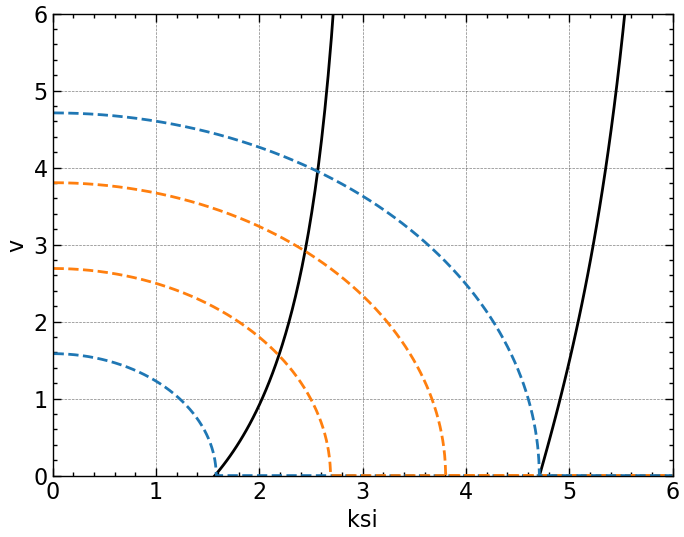

In [332]:
plt.plot(xCOT1,n1(xCOT1), color='k')
plt.plot(xCOT2,n1(xCOT2), color='k')
plt.plot(ksi,n2(ksi,52), color='tab:blue', linestyle='--')
plt.plot(ksi,n2(ksi,150), color='tab:orange', linestyle='--')
plt.plot(ksi,n2(ksi,300), color='tab:orange', linestyle='--')
plt.plot(ksi,n2(ksi,460),color='tab:blue', linestyle='--')
plt.ylim([0, 6])
plt.xlim([0, 6])
plt.xlabel('ksi')
plt.ylabel('v')
plt.show()

In [333]:
# ksil = pi/2 | ksiu = pi 

If $ L = 2.5 fm =>  L^2 = 6.25 fm^2$, then: 
$$ 8.20  \leq V_0 \leq  73.6 $$

We are going to start from a value of L=1.9 all the way up to L=3.2, with a step size of 0.1fm. For every L value, we are going to calculate the boundaries of $V_0$. Using a step of V0 = 1, we are going to get n number of pairs (L,V0) and calculate the binding energy for each one.

In [334]:
n1f = interp1d(xCOT1, n1(xCOT1), 'cubic') # n1: interpolated from 0 to pi

In [452]:

x = np.linspace(np.pi/2 + 1e-8, np.pi - 1e-8, 200) # the Ksi points.

In [288]:
n2f = interp1d(x, n2(x,V0L2),'cubic')

In [298]:
y = interp1d(x, n2f(x)-n1f(x),'cubic')

In [300]:
sol = root(y, 2.3)

In [303]:
ksi1 = sol['x'][0]

In [304]:
ksi1

2.4438694010217685

In [305]:
E = V0 - (HbarC)**2/(2* mC2*L2)*ksi1

In [555]:
def Eb(x,V0,L2):
    n2f = interp1d(x,n2(x,V0*L2),'cubic')
    y = interp1d(x, n2f(x)-n1f(x), 'cubic')
    sol = root(y,2.5)
    ksi1 = sol['x']
    E = V0 - (HbarC*HbarC)/(2* mC2*L2)*ksi1
    return float(E)
Ebinding = 2.224
def f(V):
    return Eb(x,V,L2) - Ebinding
def f90(V):
    return Eb(x,V,L2) - Ebinding*0.9
def f110(V):
    return Eb(x,V,L2) - Ebinding*1.1

In [556]:
Ll = 1
Lu = 6
L_values = np.arange(Ll,Lu + 0.1, 0.1)
x = np.linspace(0 + 1e-8, 4*np.pi, 200) # the Ksi points.
n1f = interp1d(x, n1(x), 'cubic') # n1: interpolated from 0 to pi
results = []
results90 = []
results110 = []

In [557]:
for L in L_values:
    L2 = L*L
    Vl = 52/L2
    Vu = 460/L2
    pot = float(FalsePosition(f, Vl,Vu,4)[0])
    pot90 = float(FalsePosition(f90,Vl,Vu,4)[0])
    pot110 = float(FalsePosition(f110,Vl,Vu,4)[0])
    if (pot*L2 < 52 or pot*L2>460):
        continue
    en = float(Eb(x,pot,L2))
    en90 = float(Eb(x,pot90,L2))
    en110 = float(Eb(x,pot110,L2))
    results.append({'V0': pot, 'L2': L2, '|E|': en})
    results90.append({'V0': pot90, 'L2': L2, '|E|': en90})
    results110.append({'V0': pot110, 'L2': L2, '|E|': en110})

In [559]:
df = pd.DataFrame(results)
df90 = pd.DataFrame(results90)
df110 = pd.DataFrame(results110)

In [560]:
df

,V0,L2,|E|
0,5.957304,9.00,2.223997
1,5.729046,9.61,2.223999
2,5.590958,10.24,2.223954
3,5.410271,10.89,2.224000
4,5.265607,11.56,2.223900
5,5.136917,12.25,2.223997
6,4.990426,12.96,2.224000
7,4.896231,13.69,2.223991
8,4.778046,14.44,2.223991
9,4.679975,15.21,2.223990


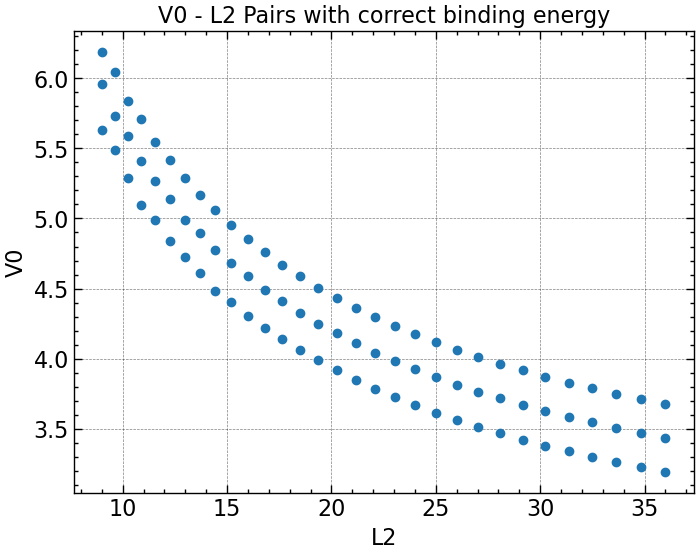

In [566]:
plt.scatter(df['L2'], df['V0'], color='tab:blue')
plt.scatter(df90['L2'], df90['V0'], color='tab:blue')
plt.scatter(df110['L2'], df110['V0'], color='tab:blue')
plt.xlabel('L2')
plt.ylabel('V0')
plt.title('V0 - L2 Pairs with correct binding energy')
plt.show()